In [1]:
# Системные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

# ЗАДАЧА 1

## ЗАГРУЖАЕМ ДАННЫЕ

In [2]:
data = pd.read_csv(r'C:\Тестовое задание\junior\regression/data_regression_for_task.csv', sep=',',encoding=' UTF-8',engine='c')
data

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,0.0
...,...,...,...,...,...,...,...,...
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66460.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9080.0,35.0
128352,2018,2,BOSTON BEER CORPORATION,99988,SAM ADAMS COLD SNAP 1/6 KG,KEGS,0.0,32.0
128353,2018,2,NaN,BC,BEER CREDIT,REF,0.0,-35.0


In [3]:
data.describe()

,YEAR,MONTH,SALES,STORE_SALES
count,128355.000000,128355.000000,1.283550e+05,128355.000000
mean,2017.206030,7.079303,6.563037e+03,22.624213
std,0.404454,3.645826,2.892494e+04,239.693277
min,2017.000000,1.000000,-6.490000e+03,-4996.000000
25%,2017.000000,5.000000,0.000000e+00,0.000000
50%,2017.000000,8.000000,3.300000e+02,1.000000
75%,2017.000000,10.000000,3.250000e+03,4.000000
max,2018.000000,12.000000,1.616600e+06,16271.750000


## ЕСТЬ ОТРИЦАТЕЛЬНЫЕ ЗНАЧЕНИЯ В ПОЛЯХ SALES и STORE_SALES УДАЛИМ ИХ

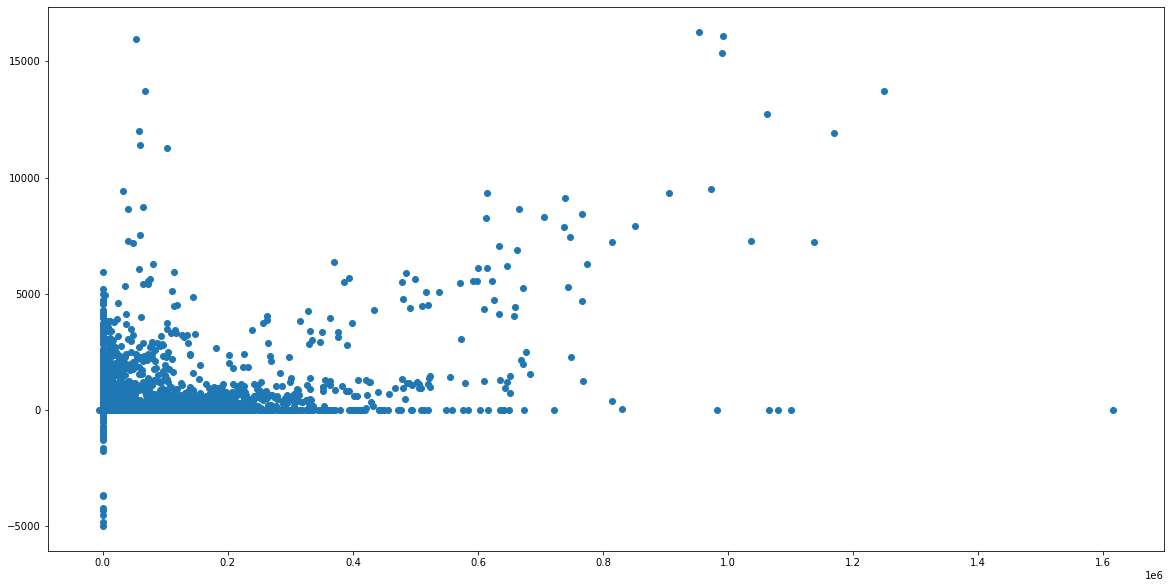

In [4]:
plt.scatter(x='SALES', y='STORE_SALES', data=data)
pass

In [5]:
data['SALES'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005         0.0
0.010         0.0
0.050         0.0
0.100         0.0
0.500       330.0
0.900     13870.0
0.950     28500.0
0.990     99935.2
0.995    154915.3
Name: SALES, dtype: float64

In [6]:
data['STORE_SALES'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      0.000
0.010      0.000
0.050      0.000
0.100      0.000
0.500      1.000
0.900     18.000
0.950     49.000
0.990    394.865
0.995    742.092
Name: STORE_SALES, dtype: float64

## ПРИМЕНИМ ФИЛЬТРЫ ДЛЯ УДАЛЕНИЯ ВЫБРОСОВ

In [7]:
rows_to_drop = data[
    (data['SALES'] < data['SALES'].quantile(0.005)) | (data['SALES'] > data['SALES'].quantile(0.995)) | 
    (data['STORE_SALES']  < data['STORE_SALES' ].quantile(0.005)) | (data['STORE_SALES']  > data['STORE_SALES' ].quantile(0.995))].index
data_norm = data.drop(rows_to_drop)
data_norm

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,0.0
...,...,...,...,...,...,...,...,...
128348,2018,2,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.0,2.0
128349,2018,2,COASTAL BREWING COMPANY LLC,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,0.0,2.0
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66460.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9080.0,35.0


In [8]:
data_norm.isna().sum()

YEAR             0
MONTH            0
CONTRAGENT       0
ARTICLE_CODE     0
ARTICLE_NAME     0
ARTICLE_GROUP    1
SALES            0
STORE_SALES      0
dtype: int64

## ЕСТЬ ПРОПУЩЕННОЕ ЗНАЧЕНИЕ, ЗАМЕНИМ ЕГО МОДОЙ

In [9]:
data_norm['ARTICLE_GROUP'].fillna(data_norm['ARTICLE_GROUP'].mode().iloc[0], inplace=True)

In [10]:
data_norm.isna().sum()

YEAR             0
MONTH            0
CONTRAGENT       0
ARTICLE_CODE     0
ARTICLE_NAME     0
ARTICLE_GROUP    0
SALES            0
STORE_SALES      0
dtype: int64

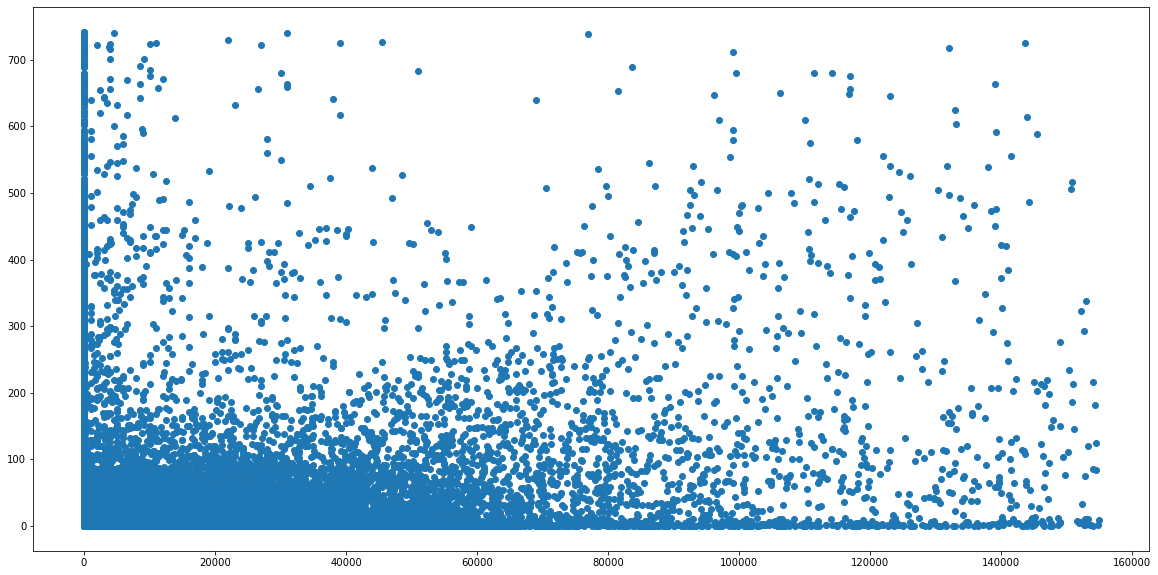

In [11]:
plt.scatter(x='SALES', y='STORE_SALES', data=data_norm)
pass

## ФИЛЬТР ПОМОГ УБРАТЬ ВЫБРОСЫ

In [12]:
data_norm.describe(include=['object'])

,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP
count,126872,126872,126872,126872
unique,333,23521,23584,7
top,REPUBLIC NATIONAL DISTRIBUTING CO,83950,LA VIELLE FERME CDV RED - 750ML,WINE
freq,9821,10,19,78796


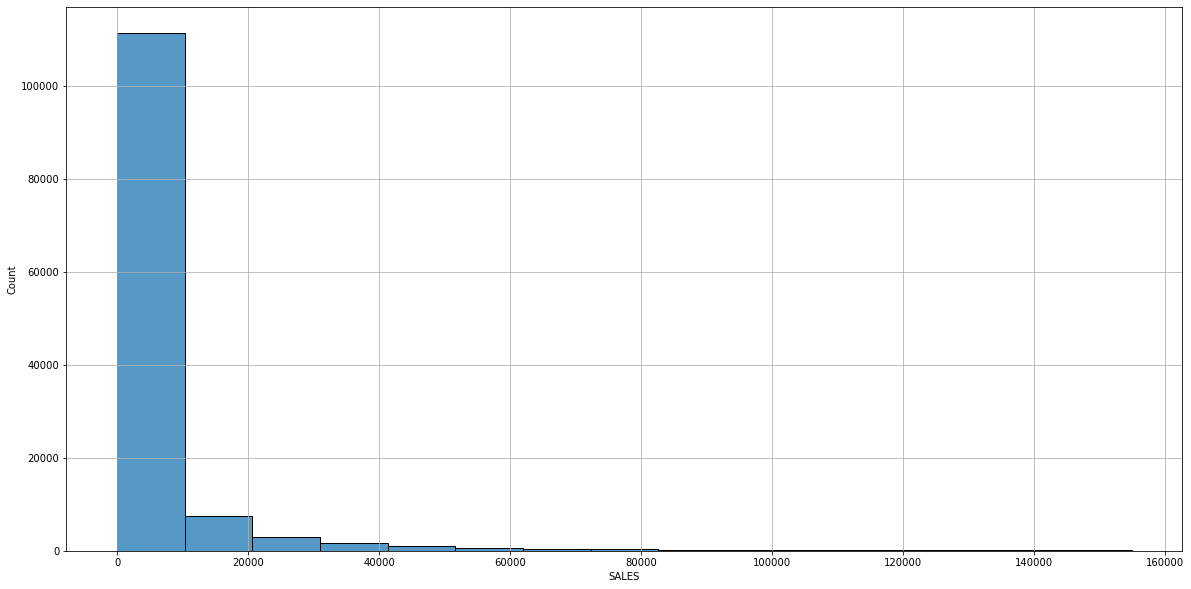

In [13]:
sns.histplot(data_norm['SALES'], bins=15)
plt.grid()
pass

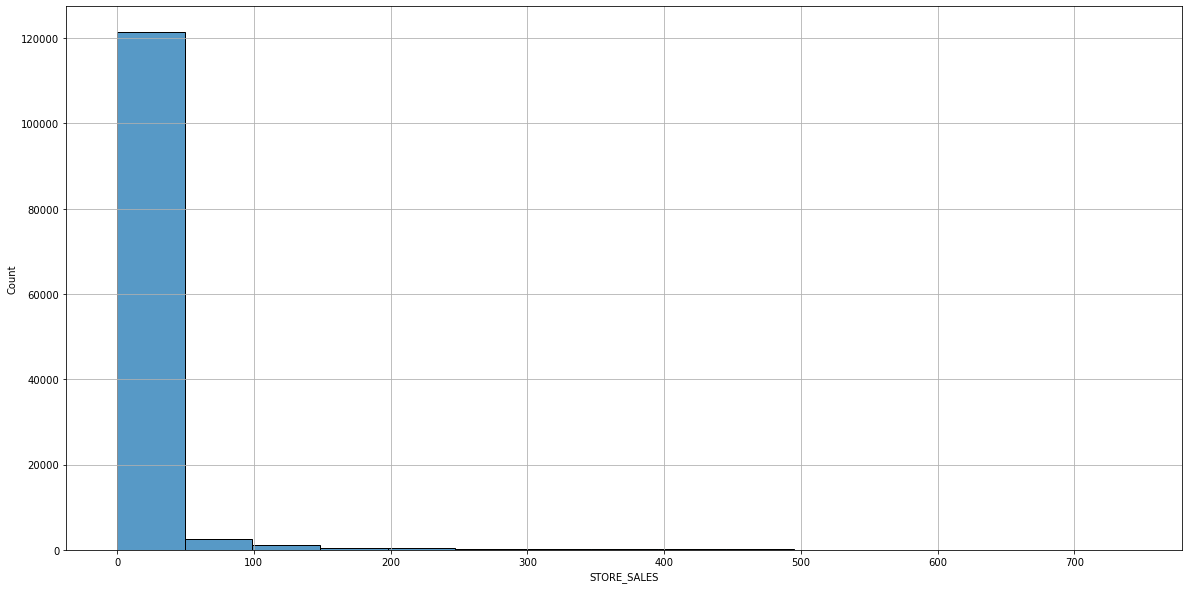

In [14]:
sns.histplot(data_norm['STORE_SALES'], bins=15)
plt.grid()
pass

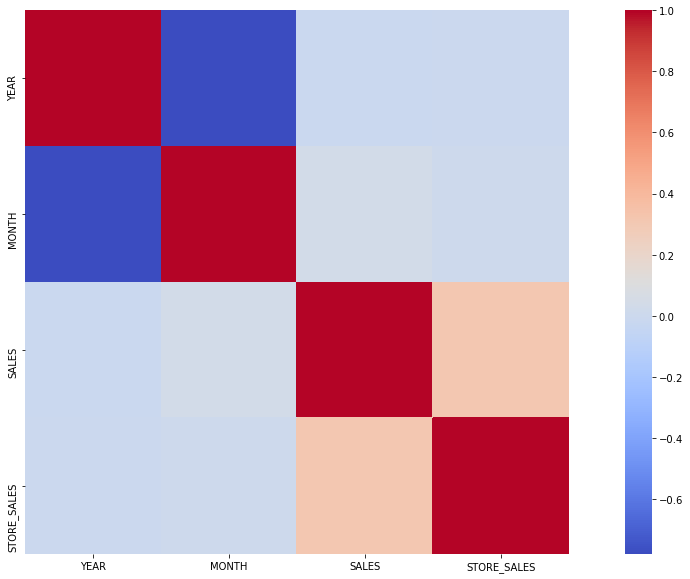

In [15]:
corr_mat = data_norm.corr()
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [16]:
data_norm['ARTICLE_GROUP'].value_counts()

WINE            78796
LIQUOR          28083
BEER            15640
KEGS             3593
NON-ALCOHOL       620
STR_SUPPLIES      105
REF                35
Name: ARTICLE_GROUP, dtype: int64

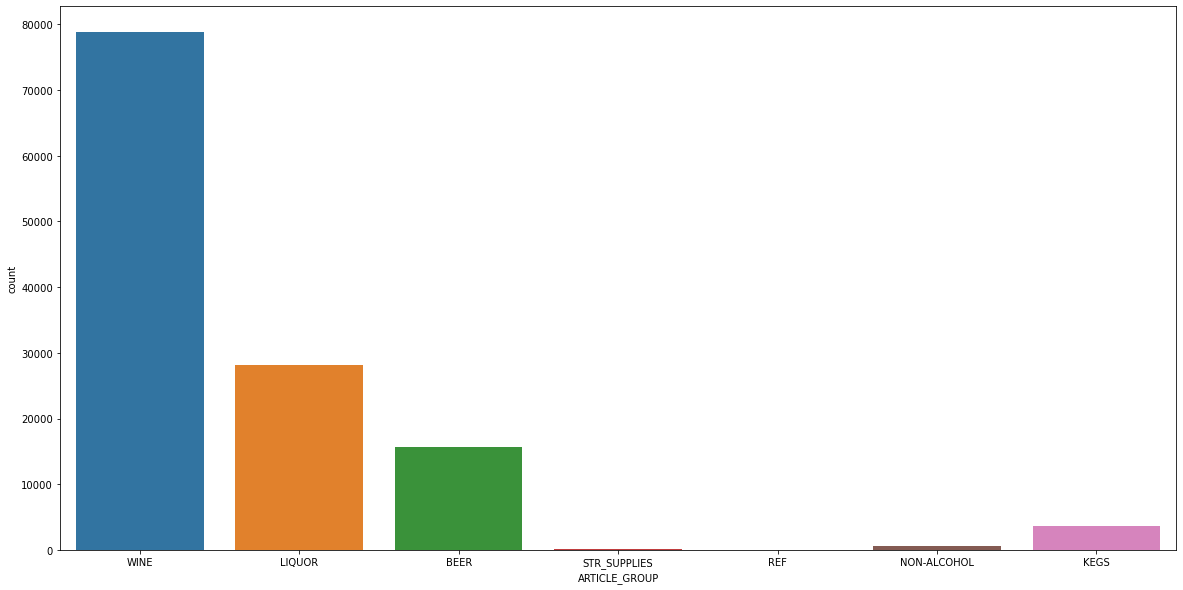

In [17]:
sns.countplot(x='ARTICLE_GROUP', data=data_norm)
pass

## ПОПРОБУЕМ ИСПОЛЬЗОВАТЬ В КАЧЕСТВЕ ПРИЗНАКОВ ВСЕ ДАННЫЕ, А ПОТОМ БУДЕТ УДАЛЯТЬ НЕИНФОРМАТИВНЫЕ ПРИЗНАКИ

In [18]:
data_norm

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,0.0
...,...,...,...,...,...,...,...,...
128348,2018,2,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.0,2.0
128349,2018,2,COASTAL BREWING COMPANY LLC,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,0.0,2.0
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66460.0,212.0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9080.0,35.0


## СТАНДАРТИЗУЕМ ЧИСЛОВЫЕ ПРИЗНАКИ

In [19]:
# data_regres = data_norm.drop(['CONTRAGENT','ARTICLE_CODE','ARTICLE_NAME','ARTICLE_GROUP'],axis = 1).set_index(['YEAR','MONTH'])
# data_stand = (data_regres - data_regres.mean(axis = 0))/data_regres.std(axis = 0)
# data_stand = data_stand.reset_index()
# data_stand = pd.merge(data_stand, data_norm[['CONTRAGENT','ARTICLE_CODE','ARTICLE_NAME','ARTICLE_GROUP']], left_index=True, right_index=True)
data_norm['STORE_SALES'] = (data_norm['STORE_SALES'] - data_norm['SALES'].mean(axis = 0))/data_norm['SALES'].std(axis = 0)
data_stand = data_norm
data_stand['CONTRAGENT'] = data_stand['CONTRAGENT'].astype('category')
data_stand['ARTICLE_CODE'] = data_stand['ARTICLE_CODE'].astype('category')
data_stand['ARTICLE_NAME'] = data_stand['ARTICLE_NAME'].astype('category')
data_stand['ARTICLE_GROUP'] = data_stand['ARTICLE_GROUP'].astype('category')
data_stand['YEAR'] = data_stand['YEAR'].astype('category')
data_stand['MONTH'] = data_stand['MONTH'].astype('category')
data_stand

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,-0.360448
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,-0.360448
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,-0.360448
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,-0.360448
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,-0.360448
...,...,...,...,...,...,...,...,...
128348,2018,2,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.0,-0.360303
128349,2018,2,COASTAL BREWING COMPANY LLC,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,0.0,-0.360303
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66460.0,-0.345067
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9080.0,-0.357909


## БУДЕМ ПРОГНОЗИРОВАТЬ ЗНАЧЕНИЯ В ПОСЛЕДНИЙ МЕСЯЦ

In [20]:
test = data_stand.loc[(data_stand['YEAR']==2018) & (data_stand['MONTH']==2)]
# test = test.drop(['YEAR','MONTH'], axis = 1)
test

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
4068,2018,2,LEGENDS LTD,99090,BITBURGER 1/2K,KEGS,0.0,-0.360303
115256,2018,2,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.0,-0.359795
115257,2018,2,INTERBALT PRODUCTS CORP,100012,PAPI P/GRIG - 750ML,WINE,0.0,-0.360376
115258,2018,2,RELIABLE CHURCHILL LLLP,1001,SAM SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.0,-0.360303
115259,2018,2,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,640.0,-0.360448
...,...,...,...,...,...,...,...,...
128348,2018,2,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.0,-0.360303
128349,2018,2,COASTAL BREWING COMPANY LLC,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,0.0,-0.360303
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66460.0,-0.345067
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9080.0,-0.357909


In [21]:
train = data_stand.drop(test.index)
# train = train.drop(['YEAR','MONTH'], axis = 1)
train

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,-0.360448
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,-0.360448
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,-0.360448
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,-0.360448
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,-0.360448
...,...,...,...,...,...,...,...,...
115249,2018,1,KATCEF BROTHERS INC,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,500.0,-0.360448
115250,2018,1,COASTAL BREWING COMPANY LLC,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,0.0,-0.360376
115251,2018,1,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,60740.0,-0.349616
115252,2018,1,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,7500.0,-0.357183


In [22]:
X_test = test.drop(['SALES'], axis=1)
y_test = test['SALES']
X_test

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,STORE_SALES
4068,2018,2,LEGENDS LTD,99090,BITBURGER 1/2K,KEGS,-0.360303
115256,2018,2,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,-0.359795
115257,2018,2,INTERBALT PRODUCTS CORP,100012,PAPI P/GRIG - 750ML,WINE,-0.360376
115258,2018,2,RELIABLE CHURCHILL LLLP,1001,SAM SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,-0.360303
115259,2018,2,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,-0.360448
...,...,...,...,...,...,...,...
128348,2018,2,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,-0.360303
128349,2018,2,COASTAL BREWING COMPANY LLC,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,-0.360303
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,-0.345067
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,-0.357909


In [23]:
X_train = train.drop(['SALES'], axis=1)
y_train = train['SALES']
X_train

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,STORE_SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,-0.360448
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,-0.360448
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,-0.360448
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,-0.360448
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,-0.360448
...,...,...,...,...,...,...,...
115249,2018,1,KATCEF BROTHERS INC,99770,SMUTTYNOSE SINGLE DIGIT 4/6NR - 12OZ,BEER,-0.360448
115250,2018,1,COASTAL BREWING COMPANY LLC,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,-0.360376
115251,2018,1,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,-0.349616
115252,2018,1,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,-0.357183


In [24]:
def metric(y_true, y_pred):
    
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_pred) * 100

## ПОДБОР ПАРАМЕТРОВ

In [25]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lg = lgb.LGBMRegressor(silent=False)
param_dist = {
              "n_estimators":  range(10,200,10),
#             "num_leaves ": range(20,40,1)
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 10)
grid_search.fit(X_train,y_train)
best_n_estimators = grid_search.best_estimator_.n_estimators
# best_num_leaves = grid_search.best_estimator_.num_leaves
print(best_n_estimators)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31289
[LightGBM] [Info] Number of data points in the train set: 113907, number of used features: 7
[LightGBM] [Info] Start training from score 4991.270335
60


In [26]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves': 31, 'objective': 'regression', 'learning_rate':0.06}
num_round = best_n_estimators
cate_features_name = ['YEAR','MONTH','CONTRAGENT','ARTICLE_CODE','ARTICLE_NAME','ARTICLE_GROUP']
bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data], categorical_feature = cate_features_name)
y_test_predict_lgbm = bst.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['ARTICLE_CODE', 'ARTICLE_GROUP', 'ARTICLE_NAME', 'CONTRAGENT', 'MONTH', 'YEAR']
  _log_warning('categorical_feature in Dataset is overridden.\n'


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31289
[LightGBM] [Info] Number of data points in the train set: 113907, number of used features: 7


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 4991.270335
[1]	valid_0's l2: 1.67255e+08
[2]	valid_0's l2: 1.58646e+08
[3]	valid_0's l2: 1.51131e+08
[4]	valid_0's l2: 1.44317e+08
[5]	valid_0's l2: 1.38332e+08
[6]	valid_0's l2: 1.32952e+08
[7]	valid_0's l2: 1.28281e+08
[8]	valid_0's l2: 1.24036e+08
[9]	valid_0's l2: 1.20268e+08
[10]	valid_0's l2: 1.1691e+08
[11]	valid_0's l2: 1.1396e+08
[12]	valid_0's l2: 1.11345e+08
[13]	valid_0's l2: 1.09079e+08
[14]	valid_0's l2: 1.07029e+08
[15]	valid_0's l2: 1.05194e+08
[16]	valid_0's l2: 1.03559e+08
[17]	valid_0's l2: 1.02178e+08
[18]	valid_0's l2: 1.00921e+08
[19]	valid_0's l2: 9.97723e+07
[20]	valid_0's l2: 9.87677e+07
[21]	valid_0's l2: 9.78133e+07
[22]	valid_0's l2: 9.71553e+07
[23]	valid_0's l2: 9.62975e+07
[24]	valid_0's l2: 9.56693e+07
[25]	valid_0's l2: 9.51733e+07
[26]	valid_0's l2: 9.46361e+07
[27]	valid_0's l2: 9.41166e+07
[28]	valid_0's l2: 9.36359e+07
[29]	valid_0's l2: 9.31927e+07
[30]	valid_0's l2: 9.28938e+07
[31]	valid_0's l2: 9.2563

In [27]:
metric(y_test,y_test_predict_lgbm)

78.48806646770431

In [119]:
importances =pd.Series(bst.feature_importance(), index=X_test.columns).sort_values(ascending=False)


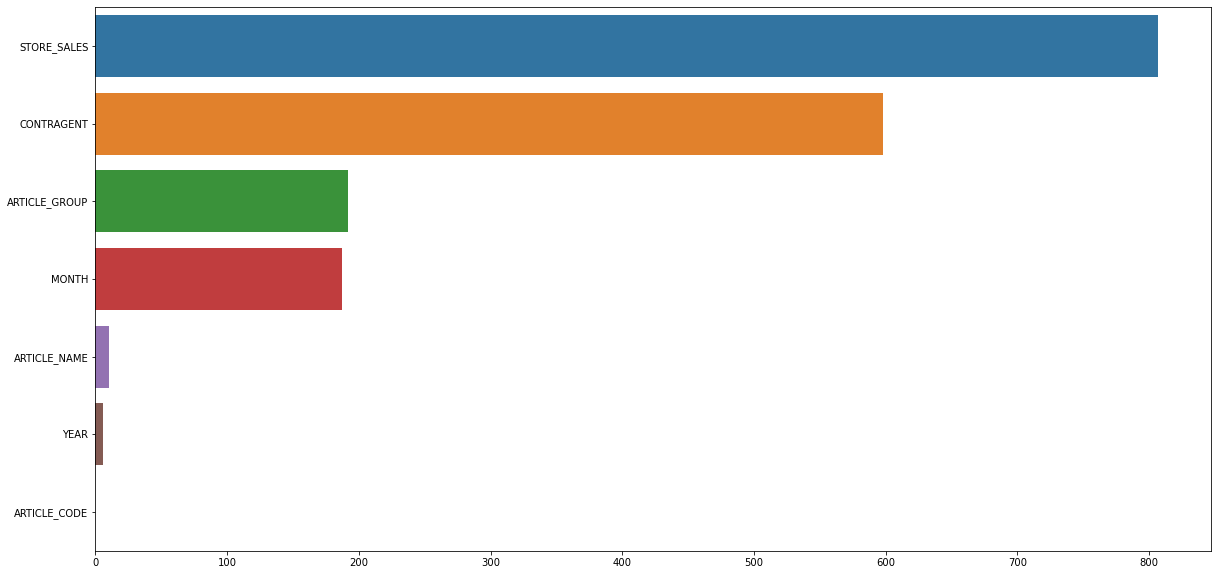

In [29]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

## УБЕРЕМ НЕИНФОРМАТИВНЫЕ ПРИЗНАКИ И ПРИЗНАКИ ДАТЫ

In [30]:
data_stand

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,ARTICLE_GROUP,SALES,STORE_SALES
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,-0.360448
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,-0.360448
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,-0.360448
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,-0.360448
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,-0.360448
...,...,...,...,...,...,...,...,...
128348,2018,2,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.0,-0.360303
128349,2018,2,COASTAL BREWING COMPANY LLC,99813,DOMINION OAK BARREL STOUT 1/2K,KEGS,0.0,-0.360303
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66460.0,-0.345067
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,9080.0,-0.357909


In [31]:
data_stand = data_stand.drop(['ARTICLE_NAME','ARTICLE_CODE'], axis = 1)
data_stand['CONTRAGENT'] = data_stand['CONTRAGENT'].astype('category')
data_stand

,YEAR,MONTH,CONTRAGENT,ARTICLE_GROUP,SALES,STORE_SALES
0,2017,4,ROYAL WINE CORP,WINE,0.0,-0.360448
1,2017,4,SANTA MARGHERITA USA INC,WINE,0.0,-0.360448
2,2017,4,JIM BEAM BRANDS CO,LIQUOR,0.0,-0.360448
3,2017,4,HEAVEN HILL DISTILLERIES INC,LIQUOR,0.0,-0.360448
4,2017,4,ROYAL WINE CORP,WINE,0.0,-0.360448
...,...,...,...,...,...,...
128348,2018,2,LEGENDS LTD,BEER,0.0,-0.360303
128349,2018,2,COASTAL BREWING COMPANY LLC,KEGS,0.0,-0.360303
128350,2018,2,ANHEUSER BUSCH INC,BEER,66460.0,-0.345067
128351,2018,2,COASTAL BREWING COMPANY LLC,BEER,9080.0,-0.357909


In [32]:
test = data_stand.loc[(data_stand['YEAR']==2018) & (data_stand['MONTH']==2)]
test = test.drop(['YEAR','MONTH'], axis = 1)
test

,CONTRAGENT,ARTICLE_GROUP,SALES,STORE_SALES
4068,LEGENDS LTD,KEGS,0.0,-0.360303
115256,REPUBLIC NATIONAL DISTRIBUTING CO,WINE,0.0,-0.359795
115257,INTERBALT PRODUCTS CORP,WINE,0.0,-0.360376
115258,RELIABLE CHURCHILL LLLP,BEER,0.0,-0.360303
115259,ROYAL WINE CORP,WINE,640.0,-0.360448
...,...,...,...,...
128348,LEGENDS LTD,BEER,0.0,-0.360303
128349,COASTAL BREWING COMPANY LLC,KEGS,0.0,-0.360303
128350,ANHEUSER BUSCH INC,BEER,66460.0,-0.345067
128351,COASTAL BREWING COMPANY LLC,BEER,9080.0,-0.357909


In [33]:
train = data_stand.drop(test.index)
train = train.drop(['YEAR','MONTH'], axis = 1)
train

,CONTRAGENT,ARTICLE_GROUP,SALES,STORE_SALES
0,ROYAL WINE CORP,WINE,0.0,-0.360448
1,SANTA MARGHERITA USA INC,WINE,0.0,-0.360448
2,JIM BEAM BRANDS CO,LIQUOR,0.0,-0.360448
3,HEAVEN HILL DISTILLERIES INC,LIQUOR,0.0,-0.360448
4,ROYAL WINE CORP,WINE,0.0,-0.360448
...,...,...,...,...
115249,KATCEF BROTHERS INC,BEER,500.0,-0.360448
115250,COASTAL BREWING COMPANY LLC,KEGS,0.0,-0.360376
115251,ANHEUSER BUSCH INC,BEER,60740.0,-0.349616
115252,COASTAL BREWING COMPANY LLC,BEER,7500.0,-0.357183


In [34]:
X_test = test.drop(['SALES'], axis=1)
y_test = test['SALES']
X_test

,CONTRAGENT,ARTICLE_GROUP,STORE_SALES
4068,LEGENDS LTD,KEGS,-0.360303
115256,REPUBLIC NATIONAL DISTRIBUTING CO,WINE,-0.359795
115257,INTERBALT PRODUCTS CORP,WINE,-0.360376
115258,RELIABLE CHURCHILL LLLP,BEER,-0.360303
115259,ROYAL WINE CORP,WINE,-0.360448
...,...,...,...
128348,LEGENDS LTD,BEER,-0.360303
128349,COASTAL BREWING COMPANY LLC,KEGS,-0.360303
128350,ANHEUSER BUSCH INC,BEER,-0.345067
128351,COASTAL BREWING COMPANY LLC,BEER,-0.357909


In [35]:
X_train = train.drop(['SALES'], axis=1)
y_train = train['SALES']
X_train

,CONTRAGENT,ARTICLE_GROUP,STORE_SALES
0,ROYAL WINE CORP,WINE,-0.360448
1,SANTA MARGHERITA USA INC,WINE,-0.360448
2,JIM BEAM BRANDS CO,LIQUOR,-0.360448
3,HEAVEN HILL DISTILLERIES INC,LIQUOR,-0.360448
4,ROYAL WINE CORP,WINE,-0.360448
...,...,...,...
115249,KATCEF BROTHERS INC,BEER,-0.360448
115250,COASTAL BREWING COMPANY LLC,KEGS,-0.360376
115251,ANHEUSER BUSCH INC,BEER,-0.349616
115252,COASTAL BREWING COMPANY LLC,BEER,-0.357183


In [36]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lg = lgb.LGBMRegressor(silent=False)
param_dist = {
              "n_estimators":  range(10,200,10),
#             "num_leaves ": range(20,40,1)
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 10)
grid_search.fit(X_train,y_train)
best_n_estimators = grid_search.best_estimator_.n_estimators
# best_num_leaves = grid_search.best_estimator_.num_leaves
print(best_n_estimators)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 517
[LightGBM] [Info] Number of data points in the train set: 113907, number of used features: 3
[LightGBM] [Info] Start training from score 4991.270335
80


In [37]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves': 31, 'objective': 'regression', 'learning_rate':0.06}
num_round = best_n_estimators
# num_round = 70
cate_features_name = ['CONTRAGENT']
bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data], categorical_feature = cate_features_name)
y_test_predict_lgbm = bst.predict(X_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['CONTRAGENT']
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Info] Total Bins 517
[LightGBM] [Info] Number of data points in the train set: 113907, number of used features: 3
[LightGBM] [Info] Start training from score 4991.270335
[1]	valid_0's l2: 1.67497e+08
[2]	valid_0's l2: 1.58912e+08
[3]	valid_0's l2: 1.51351e+08
[4]	valid_0's l2: 1.44462e+08
[5]	valid_0's l2: 1.38494e+08
[6]	valid_0's l2: 1.33291e+08
[7]	valid_0's l2: 1.28509e+08
[8]	valid_0's l2: 1.24462e+08
[9]	valid_0's l2: 1.20618e+08
[10]	valid_0's l2: 1.17257e+08
[11]	valid_0's l2: 1.14308e+08
[12]	valid_0's l2: 1.11685e+08
[13]	valid_0's l2: 1.09378e+08
[14]	valid_0's l2: 1.07365e+08
[15]	valid_0's l2: 1.05533e+08
[16]	valid_0's l2: 1.03869e+08
[17]	valid_0's l2: 1.02308e+08
[18]	valid_0's l2: 1.01006e+08
[19]	valid_0's l2: 9.98714e+07
[20]	valid_0's l2: 9.8782e+07
[21]	valid_0's l2: 9.79047e+07
[22]	valid_0's l2: 9.70771e+07
[23]	valid_0's l2: 9.6278e+07
[24]	valid_0's l2: 9.56395e+07
[25]	valid_0's l2: 9.50216e+07
[26]	valid_0's l2: 9.45007e+07
[27]	valid_0's l2: 9.3

In [38]:
metric(y_test,y_test_predict_lgbm)

76.7932884647495

In [120]:
importances = pd.Series(bst.feature_importance(), index=X_test.columns).sort_values(ascending=False)

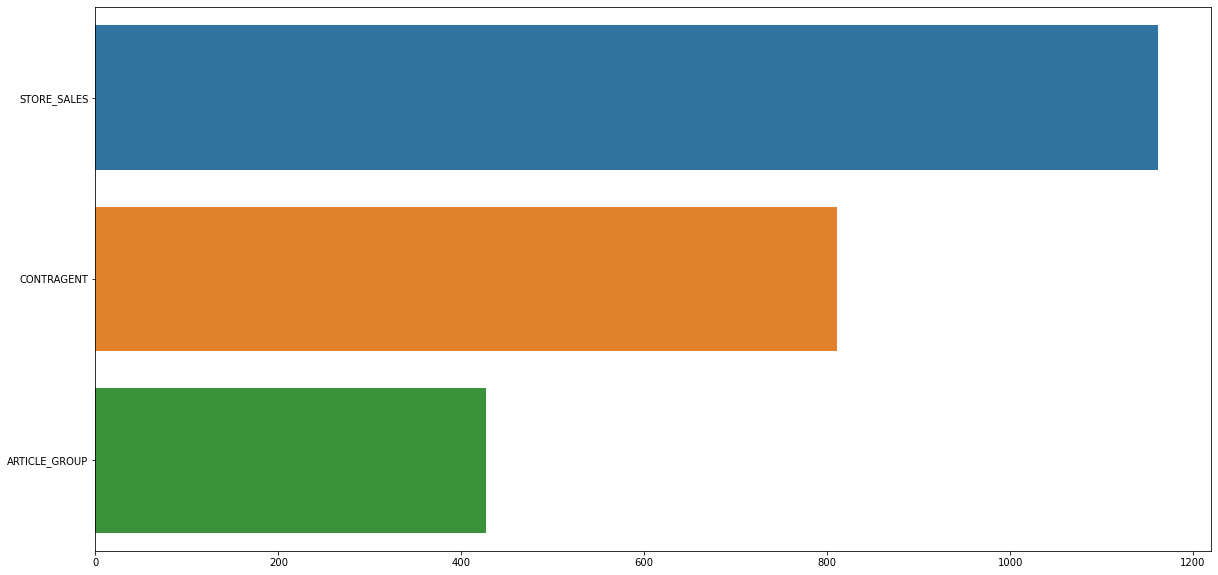

In [40]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

## ПОПРОБУЕМ ДОБАВИТЬ МЕСЯЦ К МОДЕЛИ

In [41]:
data_stand['MONTH'] = data_stand['MONTH'].astype('category')
test = data_stand.loc[(data_stand['YEAR']==2018) & (data_stand['MONTH']==2)]
test = test.drop(['YEAR'], axis = 1)
test

,MONTH,CONTRAGENT,ARTICLE_GROUP,SALES,STORE_SALES
4068,2,LEGENDS LTD,KEGS,0.0,-0.360303
115256,2,REPUBLIC NATIONAL DISTRIBUTING CO,WINE,0.0,-0.359795
115257,2,INTERBALT PRODUCTS CORP,WINE,0.0,-0.360376
115258,2,RELIABLE CHURCHILL LLLP,BEER,0.0,-0.360303
115259,2,ROYAL WINE CORP,WINE,640.0,-0.360448
...,...,...,...,...,...
128348,2,LEGENDS LTD,BEER,0.0,-0.360303
128349,2,COASTAL BREWING COMPANY LLC,KEGS,0.0,-0.360303
128350,2,ANHEUSER BUSCH INC,BEER,66460.0,-0.345067
128351,2,COASTAL BREWING COMPANY LLC,BEER,9080.0,-0.357909


In [42]:
train = data_stand.drop(test.index)
train = train.drop(['YEAR'], axis = 1)
train

,MONTH,CONTRAGENT,ARTICLE_GROUP,SALES,STORE_SALES
0,4,ROYAL WINE CORP,WINE,0.0,-0.360448
1,4,SANTA MARGHERITA USA INC,WINE,0.0,-0.360448
2,4,JIM BEAM BRANDS CO,LIQUOR,0.0,-0.360448
3,4,HEAVEN HILL DISTILLERIES INC,LIQUOR,0.0,-0.360448
4,4,ROYAL WINE CORP,WINE,0.0,-0.360448
...,...,...,...,...,...
115249,1,KATCEF BROTHERS INC,BEER,500.0,-0.360448
115250,1,COASTAL BREWING COMPANY LLC,KEGS,0.0,-0.360376
115251,1,ANHEUSER BUSCH INC,BEER,60740.0,-0.349616
115252,1,COASTAL BREWING COMPANY LLC,BEER,7500.0,-0.357183


In [43]:
X_test = test.drop(['SALES'], axis=1)
y_test = test['SALES']
X_test

,MONTH,CONTRAGENT,ARTICLE_GROUP,STORE_SALES
4068,2,LEGENDS LTD,KEGS,-0.360303
115256,2,REPUBLIC NATIONAL DISTRIBUTING CO,WINE,-0.359795
115257,2,INTERBALT PRODUCTS CORP,WINE,-0.360376
115258,2,RELIABLE CHURCHILL LLLP,BEER,-0.360303
115259,2,ROYAL WINE CORP,WINE,-0.360448
...,...,...,...,...
128348,2,LEGENDS LTD,BEER,-0.360303
128349,2,COASTAL BREWING COMPANY LLC,KEGS,-0.360303
128350,2,ANHEUSER BUSCH INC,BEER,-0.345067
128351,2,COASTAL BREWING COMPANY LLC,BEER,-0.357909


In [44]:
X_train = train.drop(['SALES'], axis=1)
y_train = train['SALES']
X_train

,MONTH,CONTRAGENT,ARTICLE_GROUP,STORE_SALES
0,4,ROYAL WINE CORP,WINE,-0.360448
1,4,SANTA MARGHERITA USA INC,WINE,-0.360448
2,4,JIM BEAM BRANDS CO,LIQUOR,-0.360448
3,4,HEAVEN HILL DISTILLERIES INC,LIQUOR,-0.360448
4,4,ROYAL WINE CORP,WINE,-0.360448
...,...,...,...,...
115249,1,KATCEF BROTHERS INC,BEER,-0.360448
115250,1,COASTAL BREWING COMPANY LLC,KEGS,-0.360376
115251,1,ANHEUSER BUSCH INC,BEER,-0.349616
115252,1,COASTAL BREWING COMPANY LLC,BEER,-0.357183


In [45]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lg = lgb.LGBMRegressor(silent=False)
param_dist = {
              "n_estimators":  range(10,200,10),
#             "num_leaves ": range(20,40,1)
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 10)
grid_search.fit(X_train,y_train)
best_n_estimators = grid_search.best_estimator_.n_estimators
# best_num_leaves = grid_search.best_estimator_.num_leaves
print(best_n_estimators)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 113907, number of used features: 4
[LightGBM] [Info] Start training from score 4991.270335
60


In [46]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves': 31, 'objective': 'regression', 'learning_rate':0.06}
num_round = best_n_estimators
# num_round = 70
cate_features_name = ['CONTRAGENT','MONTH']
bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data], categorical_feature = cate_features_name)
y_test_predict_lgbm = bst.predict(X_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 113907, number of used features: 4


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['CONTRAGENT', 'MONTH']
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 4991.270335
[1]	valid_0's l2: 1.67493e+08
[2]	valid_0's l2: 1.58914e+08
[3]	valid_0's l2: 1.51367e+08
[4]	valid_0's l2: 1.4449e+08
[5]	valid_0's l2: 1.38534e+08
[6]	valid_0's l2: 1.33252e+08
[7]	valid_0's l2: 1.28456e+08
[8]	valid_0's l2: 1.24348e+08
[9]	valid_0's l2: 1.20528e+08
[10]	valid_0's l2: 1.17166e+08
[11]	valid_0's l2: 1.1428e+08
[12]	valid_0's l2: 1.11677e+08
[13]	valid_0's l2: 1.09426e+08
[14]	valid_0's l2: 1.07426e+08
[15]	valid_0's l2: 1.05558e+08
[16]	valid_0's l2: 1.03855e+08
[17]	valid_0's l2: 1.02389e+08
[18]	valid_0's l2: 1.01133e+08
[19]	valid_0's l2: 1.00002e+08
[20]	valid_0's l2: 9.89728e+07
[21]	valid_0's l2: 9.80966e+07
[22]	valid_0's l2: 9.72671e+07
[23]	valid_0's l2: 9.65977e+07
[24]	valid_0's l2: 9.59729e+07
[25]	valid_0's l2: 9.538e+07
[26]	valid_0's l2: 9.47997e+07
[27]	valid_0's l2: 9.42914e+07
[28]	valid_0's l2: 9.38534e+07
[29]	valid_0's l2: 9.34382e+07
[30]	valid_0's l2: 9.30392e+07
[31]	valid_0's l2: 9.27316e

In [47]:
metric(y_test,y_test_predict_lgbm)

79.05713764441536

In [121]:
importances = pd.Series(bst.feature_importance(), index=X_test.columns).sort_values(ascending=False)

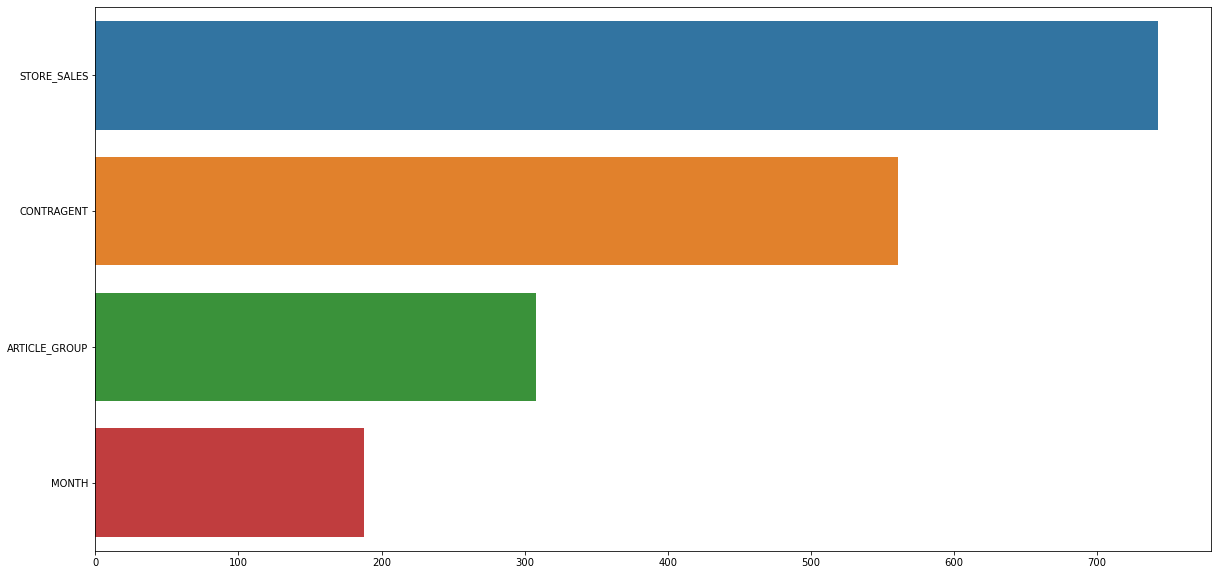

In [49]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

## ПОПРОБУЕМ БИНАРИЗОВАТЬ ПРИЗНАК ARTICLE_GROUP И НЕ ИСПОЛЬЗОВАТЬ ДАТУ

In [50]:
dummies = pd.get_dummies(data_norm['ARTICLE_GROUP'])
data_norm = pd.concat((data_norm, dummies), axis=1)
data_norm = data_norm.drop(['ARTICLE_GROUP'], axis=1)
data_norm

,YEAR,MONTH,CONTRAGENT,ARTICLE_CODE,ARTICLE_NAME,SALES,STORE_SALES,BEER,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,0.0,-0.360448,0,0,0,0,0,0,1
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,0.0,-0.360448,0,0,0,0,0,0,1
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,0.0,-0.360448,0,0,1,0,0,0,0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,0.0,-0.360448,0,0,1,0,0,0,0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,0.0,-0.360448,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128348,2018,2,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,0.0,-0.360303,1,0,0,0,0,0,0
128349,2018,2,COASTAL BREWING COMPANY LLC,99813,DOMINION OAK BARREL STOUT 1/2K,0.0,-0.360303,0,1,0,0,0,0,0
128350,2018,2,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,66460.0,-0.345067,1,0,0,0,0,0,0
128351,2018,2,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,9080.0,-0.357909,1,0,0,0,0,0,0


In [51]:
data_norm['STORE_SALES'] = (data_norm['STORE_SALES'] - data_norm['STORE_SALES'].mean(axis = 0))/data_norm['STORE_SALES'].std(axis = 0)

In [52]:
data_stand = data_norm

In [53]:
data_stand['CONTRAGENT'] = data_stand['CONTRAGENT'].astype('category')
data_stand['BEER'] = data_stand['BEER'].astype('category')
data_stand['KEGS'] = data_stand['KEGS'].astype('category')
data_stand['LIQUOR'] = data_stand['LIQUOR'].astype('category')
data_stand['NON-ALCOHOL'] = data_stand['NON-ALCOHOL'].astype('category')
data_stand['REF'] = data_stand['REF'].astype('category')
data_stand['STR_SUPPLIES'] = data_stand['STR_SUPPLIES'].astype('category')
data_stand['WINE'] = data_stand['WINE'].astype('category')

In [54]:
data_stand = data_stand.drop(['ARTICLE_CODE','ARTICLE_NAME'],axis = 1)
data_stand

,YEAR,MONTH,CONTRAGENT,SALES,STORE_SALES,BEER,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
0,2017,4,ROYAL WINE CORP,0.0,-0.234672,0,0,0,0,0,0,1
1,2017,4,SANTA MARGHERITA USA INC,0.0,-0.234672,0,0,0,0,0,0,1
2,2017,4,JIM BEAM BRANDS CO,0.0,-0.234672,0,0,1,0,0,0,0
3,2017,4,HEAVEN HILL DISTILLERIES INC,0.0,-0.234672,0,0,1,0,0,0,0
4,2017,4,ROYAL WINE CORP,0.0,-0.234672,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
128348,2018,2,LEGENDS LTD,0.0,-0.190724,1,0,0,0,0,0,0
128349,2018,2,COASTAL BREWING COMPANY LLC,0.0,-0.190724,0,1,0,0,0,0,0
128350,2018,2,ANHEUSER BUSCH INC,66460.0,4.423752,1,0,0,0,0,0,0
128351,2018,2,COASTAL BREWING COMPANY LLC,9080.0,0.534408,1,0,0,0,0,0,0


In [55]:
test = data_stand.loc[(data_stand['YEAR']==2018) & (data_stand['MONTH']==2)]
test = test.drop(['YEAR','MONTH'], axis = 1)
test

,CONTRAGENT,SALES,STORE_SALES,BEER,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
4068,LEGENDS LTD,0.0,-0.190724,0,1,0,0,0,0,0
115256,REPUBLIC NATIONAL DISTRIBUTING CO,0.0,-0.036909,0,0,0,0,0,0,1
115257,INTERBALT PRODUCTS CORP,0.0,-0.212698,0,0,0,0,0,0,1
115258,RELIABLE CHURCHILL LLLP,0.0,-0.190724,1,0,0,0,0,0,0
115259,ROYAL WINE CORP,640.0,-0.234672,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
128348,LEGENDS LTD,0.0,-0.190724,1,0,0,0,0,0,0
128349,COASTAL BREWING COMPANY LLC,0.0,-0.190724,0,1,0,0,0,0,0
128350,ANHEUSER BUSCH INC,66460.0,4.423752,1,0,0,0,0,0,0
128351,COASTAL BREWING COMPANY LLC,9080.0,0.534408,1,0,0,0,0,0,0


In [56]:
train = data_stand.drop(test.index)
train = train.drop(['YEAR','MONTH'], axis = 1)
train

,CONTRAGENT,SALES,STORE_SALES,BEER,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
0,ROYAL WINE CORP,0.0,-0.234672,0,0,0,0,0,0,1
1,SANTA MARGHERITA USA INC,0.0,-0.234672,0,0,0,0,0,0,1
2,JIM BEAM BRANDS CO,0.0,-0.234672,0,0,1,0,0,0,0
3,HEAVEN HILL DISTILLERIES INC,0.0,-0.234672,0,0,1,0,0,0,0
4,ROYAL WINE CORP,0.0,-0.234672,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
115249,KATCEF BROTHERS INC,500.0,-0.234672,1,0,0,0,0,0,0
115250,COASTAL BREWING COMPANY LLC,0.0,-0.212698,0,1,0,0,0,0,0
115251,ANHEUSER BUSCH INC,60740.0,3.046001,1,0,0,0,0,0,0
115252,COASTAL BREWING COMPANY LLC,7500.0,0.754145,1,0,0,0,0,0,0


In [57]:
X_test = test.drop(['SALES'], axis=1)
y_test = test['SALES']
X_test

,CONTRAGENT,STORE_SALES,BEER,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
4068,LEGENDS LTD,-0.190724,0,1,0,0,0,0,0
115256,REPUBLIC NATIONAL DISTRIBUTING CO,-0.036909,0,0,0,0,0,0,1
115257,INTERBALT PRODUCTS CORP,-0.212698,0,0,0,0,0,0,1
115258,RELIABLE CHURCHILL LLLP,-0.190724,1,0,0,0,0,0,0
115259,ROYAL WINE CORP,-0.234672,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
128348,LEGENDS LTD,-0.190724,1,0,0,0,0,0,0
128349,COASTAL BREWING COMPANY LLC,-0.190724,0,1,0,0,0,0,0
128350,ANHEUSER BUSCH INC,4.423752,1,0,0,0,0,0,0
128351,COASTAL BREWING COMPANY LLC,0.534408,1,0,0,0,0,0,0


In [58]:
X_train = train.drop(['SALES'], axis=1)
y_train = train['SALES']
X_train

,CONTRAGENT,STORE_SALES,BEER,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
0,ROYAL WINE CORP,-0.234672,0,0,0,0,0,0,1
1,SANTA MARGHERITA USA INC,-0.234672,0,0,0,0,0,0,1
2,JIM BEAM BRANDS CO,-0.234672,0,0,1,0,0,0,0
3,HEAVEN HILL DISTILLERIES INC,-0.234672,0,0,1,0,0,0,0
4,ROYAL WINE CORP,-0.234672,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
115249,KATCEF BROTHERS INC,-0.234672,1,0,0,0,0,0,0
115250,COASTAL BREWING COMPANY LLC,-0.212698,0,1,0,0,0,0,0
115251,ANHEUSER BUSCH INC,3.046001,1,0,0,0,0,0,0
115252,COASTAL BREWING COMPANY LLC,0.754145,1,0,0,0,0,0,0


In [59]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lg = lgb.LGBMRegressor(silent=False)
param_dist = {
              "n_estimators":  range(10,200,10),
#             "num_leaves ": range(20,40,1)
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 10)
grid_search.fit(X_train,y_train)
best_n_estimators = grid_search.best_estimator_.n_estimators
# best_num_leaves = grid_search.best_estimator_.num_leaves
print(best_n_estimators)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 113907, number of used features: 9
[LightGBM] [Info] Start training from score 4991.270335
80


In [60]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves': 31, 'objective': 'regression', 'learning_rate':0.06}
# param['metric'] = 'multi_logloss'
num_round = best_n_estimators
# num_round = 20
cate_features_name = ['CONTRAGENT','BEER','KEGS','LIQUOR','NON-ALCOHOL','REF','STR_SUPPLIES','WINE']
bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data], categorical_feature = cate_features_name)
y_test_predict_lgbm = bst.predict(X_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BEER', 'CONTRAGENT', 'KEGS', 'LIQUOR', 'NON-ALCOHOL', 'REF', 'STR_SUPPLIES', 'WINE']
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 113907, number of used features: 9
[LightGBM] [Info] Start training from score 4991.270335
[1]	valid_0's l2: 1.67251e+08
[2]	valid_0's l2: 1.58589e+08
[3]	valid_0's l2: 1.51001e+08
[4]	valid_0's l2: 1.44159e+08
[5]	valid_0's l2: 1.38091e+08
[6]	valid_0's l2: 1.32771e+08
[7]	valid_0's l2: 1.28015e+08
[8]	valid_0's l2: 1.23742e+08
[9]	valid_0's l2: 1.20021e+08
[10]	valid_0's l2: 1.16681e+08
[11]	valid_0's l2: 1.13691e+08
[12]	valid_0's l2: 1.11092e+08
[13]	valid_0's l2: 1.0877e+08
[14]	valid_0's l2: 1.0672e+08
[15]	valid_0's l2: 1.04866e+08
[16]	valid_0's l2: 1.03172e+08
[17]	valid_0's l2: 1.01742e+08
[18]	valid_0's l2: 1.00405e+08
[19]	valid_0's l2: 9.926e+07
[20]	valid_0's l2: 9.81849e+07
[21]	valid_0's l2: 9.72373e+07
[22]	valid_0's l2: 9.64518e+07
[23]	valid_0's l2: 9.56606e+07
[24]	valid_0's l2: 9.49729e+07
[25]	valid_0's l2: 9.43364e+07
[26]	valid_0's l2: 9.37847e+07
[27]	valid_0's l2: 9.328

In [61]:
metric(y_test,y_test_predict_lgbm)

76.53211796084334

In [122]:
importances = pd.Series(bst.feature_importance(), index=X_test.columns).sort_values(ascending=False)

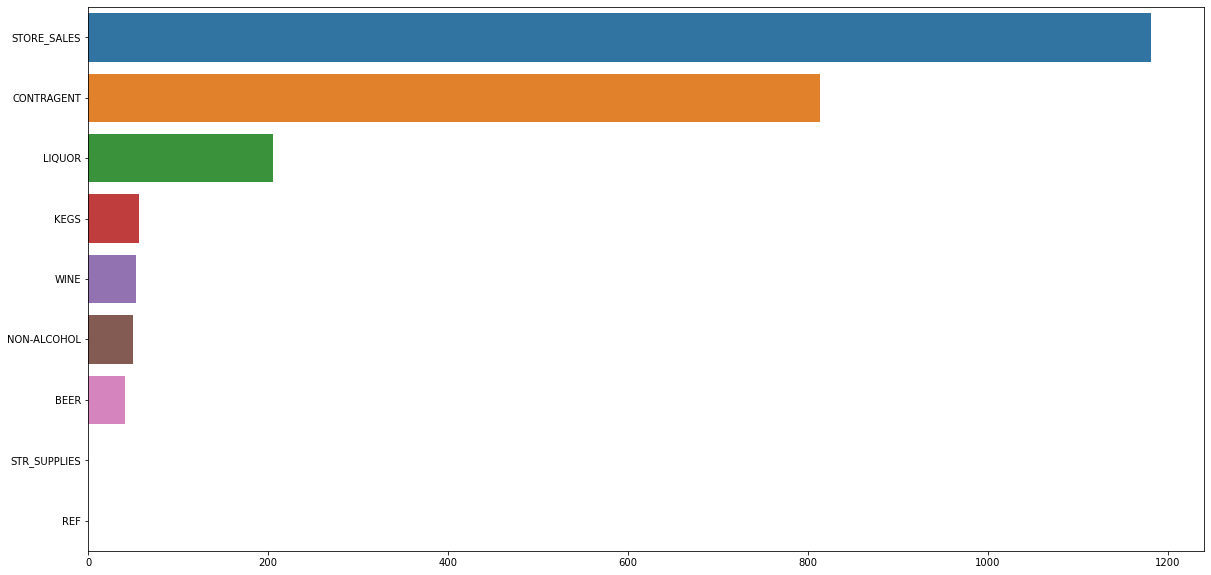

In [63]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

## ПОПРОБУЕМ ДОБАВИТЬ МЕСЯЦ К МОДЕЛИ

In [64]:
data_stand

,YEAR,MONTH,CONTRAGENT,SALES,STORE_SALES,BEER,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
0,2017,4,ROYAL WINE CORP,0.0,-0.234672,0,0,0,0,0,0,1
1,2017,4,SANTA MARGHERITA USA INC,0.0,-0.234672,0,0,0,0,0,0,1
2,2017,4,JIM BEAM BRANDS CO,0.0,-0.234672,0,0,1,0,0,0,0
3,2017,4,HEAVEN HILL DISTILLERIES INC,0.0,-0.234672,0,0,1,0,0,0,0
4,2017,4,ROYAL WINE CORP,0.0,-0.234672,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
128348,2018,2,LEGENDS LTD,0.0,-0.190724,1,0,0,0,0,0,0
128349,2018,2,COASTAL BREWING COMPANY LLC,0.0,-0.190724,0,1,0,0,0,0,0
128350,2018,2,ANHEUSER BUSCH INC,66460.0,4.423752,1,0,0,0,0,0,0
128351,2018,2,COASTAL BREWING COMPANY LLC,9080.0,0.534408,1,0,0,0,0,0,0


In [65]:
test = data_stand.loc[(data_stand['YEAR']==2018) & (data_stand['MONTH']==2)]
test = test.drop(['YEAR'], axis = 1)
test

,MONTH,CONTRAGENT,SALES,STORE_SALES,BEER,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
4068,2,LEGENDS LTD,0.0,-0.190724,0,1,0,0,0,0,0
115256,2,REPUBLIC NATIONAL DISTRIBUTING CO,0.0,-0.036909,0,0,0,0,0,0,1
115257,2,INTERBALT PRODUCTS CORP,0.0,-0.212698,0,0,0,0,0,0,1
115258,2,RELIABLE CHURCHILL LLLP,0.0,-0.190724,1,0,0,0,0,0,0
115259,2,ROYAL WINE CORP,640.0,-0.234672,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
128348,2,LEGENDS LTD,0.0,-0.190724,1,0,0,0,0,0,0
128349,2,COASTAL BREWING COMPANY LLC,0.0,-0.190724,0,1,0,0,0,0,0
128350,2,ANHEUSER BUSCH INC,66460.0,4.423752,1,0,0,0,0,0,0
128351,2,COASTAL BREWING COMPANY LLC,9080.0,0.534408,1,0,0,0,0,0,0


In [66]:
train = data_stand.drop(test.index)
train = train.drop(['YEAR'], axis = 1)
train

,MONTH,CONTRAGENT,SALES,STORE_SALES,BEER,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
0,4,ROYAL WINE CORP,0.0,-0.234672,0,0,0,0,0,0,1
1,4,SANTA MARGHERITA USA INC,0.0,-0.234672,0,0,0,0,0,0,1
2,4,JIM BEAM BRANDS CO,0.0,-0.234672,0,0,1,0,0,0,0
3,4,HEAVEN HILL DISTILLERIES INC,0.0,-0.234672,0,0,1,0,0,0,0
4,4,ROYAL WINE CORP,0.0,-0.234672,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
115249,1,KATCEF BROTHERS INC,500.0,-0.234672,1,0,0,0,0,0,0
115250,1,COASTAL BREWING COMPANY LLC,0.0,-0.212698,0,1,0,0,0,0,0
115251,1,ANHEUSER BUSCH INC,60740.0,3.046001,1,0,0,0,0,0,0
115252,1,COASTAL BREWING COMPANY LLC,7500.0,0.754145,1,0,0,0,0,0,0


In [67]:
X_test = test.drop(['SALES'], axis=1)
y_test = test['SALES']
X_test

,MONTH,CONTRAGENT,STORE_SALES,BEER,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
4068,2,LEGENDS LTD,-0.190724,0,1,0,0,0,0,0
115256,2,REPUBLIC NATIONAL DISTRIBUTING CO,-0.036909,0,0,0,0,0,0,1
115257,2,INTERBALT PRODUCTS CORP,-0.212698,0,0,0,0,0,0,1
115258,2,RELIABLE CHURCHILL LLLP,-0.190724,1,0,0,0,0,0,0
115259,2,ROYAL WINE CORP,-0.234672,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
128348,2,LEGENDS LTD,-0.190724,1,0,0,0,0,0,0
128349,2,COASTAL BREWING COMPANY LLC,-0.190724,0,1,0,0,0,0,0
128350,2,ANHEUSER BUSCH INC,4.423752,1,0,0,0,0,0,0
128351,2,COASTAL BREWING COMPANY LLC,0.534408,1,0,0,0,0,0,0


In [68]:
X_train = train.drop(['SALES'], axis=1)
y_train = train['SALES']
X_train

,MONTH,CONTRAGENT,STORE_SALES,BEER,KEGS,LIQUOR,NON-ALCOHOL,REF,STR_SUPPLIES,WINE
0,4,ROYAL WINE CORP,-0.234672,0,0,0,0,0,0,1
1,4,SANTA MARGHERITA USA INC,-0.234672,0,0,0,0,0,0,1
2,4,JIM BEAM BRANDS CO,-0.234672,0,0,1,0,0,0,0
3,4,HEAVEN HILL DISTILLERIES INC,-0.234672,0,0,1,0,0,0,0
4,4,ROYAL WINE CORP,-0.234672,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
115249,1,KATCEF BROTHERS INC,-0.234672,1,0,0,0,0,0,0
115250,1,COASTAL BREWING COMPANY LLC,-0.212698,0,1,0,0,0,0,0
115251,1,ANHEUSER BUSCH INC,3.046001,1,0,0,0,0,0,0
115252,1,COASTAL BREWING COMPANY LLC,0.754145,1,0,0,0,0,0,0


In [69]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lg = lgb.LGBMRegressor(silent=False)
param_dist = {
              "n_estimators":  range(10,200,10),
#             "num_leaves ": range(20,40,1)
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 10)
grid_search.fit(X_train,y_train)
best_n_estimators = grid_search.best_estimator_.n_estimators
# best_num_leaves = grid_search.best_estimator_.num_leaves
print(best_n_estimators)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 538
[LightGBM] [Info] Number of data points in the train set: 113907, number of used features: 10
[LightGBM] [Info] Start training from score 4991.270335
60


In [70]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves': 31, 'objective': 'regression', 'learning_rate':0.06}
# param['metric'] = 'multi_logloss'
num_round = best_n_estimators
# num_round = 20
cate_features_name = ['CONTRAGENT','BEER','KEGS','LIQUOR','NON-ALCOHOL','REF','STR_SUPPLIES','WINE','MONTH']
bst = lgb.train(param, train_data, num_round, valid_sets=[validation_data], categorical_feature = cate_features_name)
y_test_predict_lgbm = bst.predict(X_test)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['BEER', 'CONTRAGENT', 'KEGS', 'LIQUOR', 'MONTH', 'NON-ALCOHOL', 'REF', 'STR_SUPPLIES', 'WINE']
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))



[LightGBM] [Info] Total Bins 538
[LightGBM] [Info] Number of data points in the train set: 113907, number of used features: 10
[LightGBM] [Info] Start training from score 4991.270335
[1]	valid_0's l2: 1.67271e+08
[2]	valid_0's l2: 1.5862e+08
[3]	valid_0's l2: 1.51026e+08
[4]	valid_0's l2: 1.44197e+08
[5]	valid_0's l2: 1.38132e+08
[6]	valid_0's l2: 1.32845e+08
[7]	valid_0's l2: 1.28047e+08
[8]	valid_0's l2: 1.23786e+08
[9]	valid_0's l2: 1.20059e+08
[10]	valid_0's l2: 1.16718e+08
[11]	valid_0's l2: 1.13802e+08
[12]	valid_0's l2: 1.11164e+08
[13]	valid_0's l2: 1.08821e+08
[14]	valid_0's l2: 1.0684e+08
[15]	valid_0's l2: 1.04967e+08
[16]	valid_0's l2: 1.03371e+08
[17]	valid_0's l2: 1.01946e+08
[18]	valid_0's l2: 1.00682e+08
[19]	valid_0's l2: 9.95495e+07
[20]	valid_0's l2: 9.84578e+07
[21]	valid_0's l2: 9.75356e+07
[22]	valid_0's l2: 9.66937e+07
[23]	valid_0's l2: 9.60179e+07
[24]	valid_0's l2: 9.53897e+07
[25]	valid_0's l2: 9.4731e+07
[26]	valid_0's l2: 9.42546e+07
[27]	valid_0's l2: 9.3

In [71]:
metric(y_test,y_test_predict_lgbm)

78.38662053493972

In [123]:
importances = pd.Series(bst.feature_importance(), index=X_test.columns).sort_values(ascending=False)

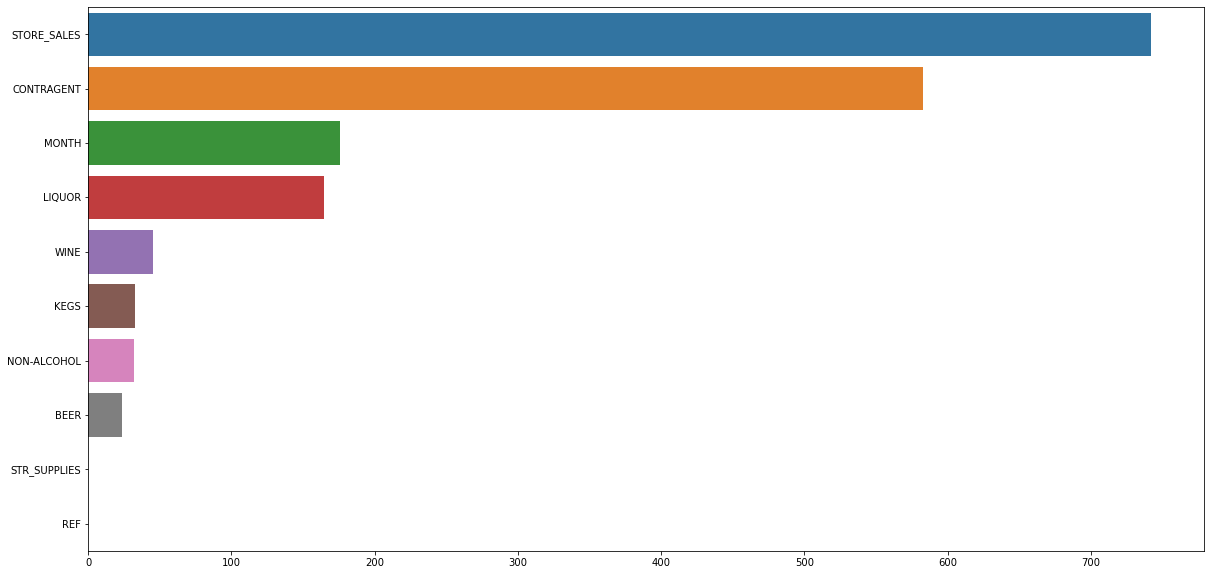

In [73]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

# ВЫВОД ЛУЧШИЙ РЕЗУЛЬТАТ ПОЛУЧИЛСЯ ПРИ ИСПОЛЬЗОВАНИИ ПАРАМЕТРОВ, STORE_SALES, CONTRAGENT, И БИНАРИЗАЦИИ ПРИЗНАКА ARTICLE_GROUP. РЕЗУЛЬТАТ МЕТРИКИ 76.53

# ЗАДАЧА 2

## ЗАГРУЖАЕМ ДАННЫЕ

In [74]:
data = pd.read_csv(r'C:\Тестовое задание\junior\classification/data_classification_for_task.csv', sep=',',encoding=' UTF-8',engine='c')
data

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [75]:
data.describe()

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [76]:
data.isna().sum()

AGE           0
GENDER        0
FEATURE_1     0
FEATURE_2     0
FEATURE_3     0
FEATURE_4     0
FEATURE_5     0
FEATURE_6     0
FEATURE_7     0
FEATURE_8     0
FEATURE_9     0
FEATURE_10    0
FEATURE_11    0
TARGET        0
dtype: int64

In [77]:
data.TARGET.unique()

array([1, 0], dtype=int64)

In [78]:
data.TARGET.value_counts().reset_index()

,index,TARGET
0,1,165
1,0,138


In [79]:
data.corr()

,AGE,GENDER,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,TARGET
AGE,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
GENDER,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
FEATURE_1,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
FEATURE_2,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
FEATURE_3,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
FEATURE_4,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
FEATURE_5,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
FEATURE_6,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
FEATURE_7,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
FEATURE_8,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## МЫ ВИДИМ, ЧТО FEATURE_9 ИМЕЕТ БОЛЬШУЮ ПО МОДУЛЮ КОРРЕЛЯЦИЮ С FEATURE_8 и с FEATURE_6

In [80]:
data.corr().where(np.triu(abs(data.corr()) > 0.2, k=1)).stack().sort_values(ascending=False).reset_index().loc[data.corr().where(np.triu(abs(data.corr()) > 0.2, k=1)).stack().sort_values(ascending=False).reset_index().level_1!='TARGET']

,level_0,level_1,0
2,FEATURE_6,FEATURE_9,0.386784
4,FEATURE_1,FEATURE_6,0.295762
5,FEATURE_7,FEATURE_8,0.288223
6,AGE,FEATURE_2,0.279351
7,AGE,FEATURE_10,0.276326
8,FEATURE_8,FEATURE_10,0.222682
9,AGE,FEATURE_3,0.213678
10,FEATURE_8,FEATURE_11,0.210244
11,GENDER,FEATURE_11,0.210041
12,AGE,FEATURE_8,0.210013


## ПЕРЕМЕННЫЕ ИМЕЮЩИЕ САМУЮ МАЛЕНЬКУЮ СВЯЗЬ С ИССЛЕДУЕМОЙ ПЕРЕМЕННОЙ

In [81]:
data.corr().where(np.triu(abs(data.corr()) < 0.2, k=1)).stack().sort_values().reset_index().loc[data.corr().where(np.triu(abs(data.corr()) < 0.2, k=1)).stack().sort_values().reset_index().level_1=='TARGET']

,level_0,level_1,0
6,FEATURE_2,TARGET,-0.144931
13,FEATURE_3,TARGET,-0.085239
29,FEATURE_4,TARGET,-0.028046
58,FEATURE_5,TARGET,0.137230


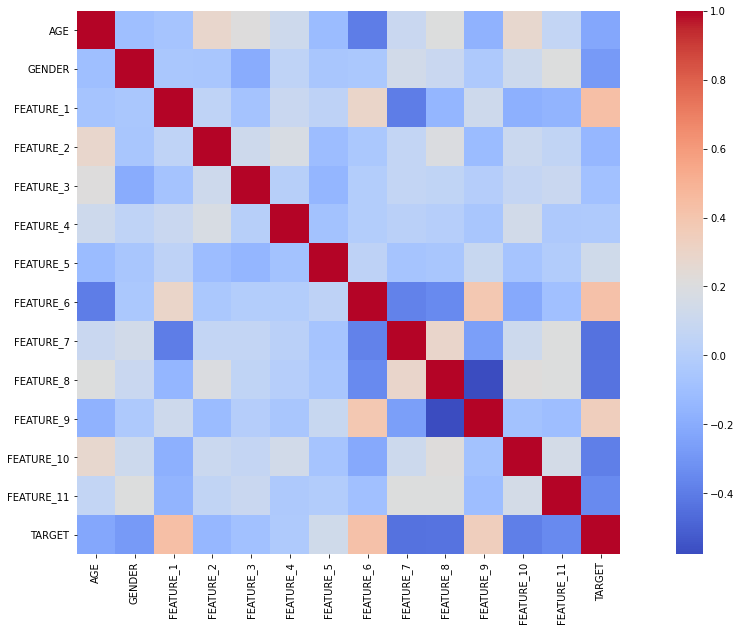

In [82]:
corr_mat = data.corr()
sns.heatmap(data.corr(), square=True, cmap='coolwarm')
pass

In [83]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand = data_stand.drop(['GENDER','TARGET'], axis = 1)
data_stand = pd.merge(data_stand, data[['GENDER','TARGET']], left_index=True, right_index=True)
data_stand

,AGE,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,GENDER,TARGET
0,0.950624,1.969864,0.762694,-0.255910,2.390484,-1.004171,0.015417,-0.69548,1.085542,-2.270822,-0.713249,-2.145324,1,1
1,-1.912150,1.000921,-0.092585,0.072080,-0.416945,0.897478,1.630774,-0.69548,2.119067,-2.270822,-0.713249,-0.512075,1,1
2,-1.471723,0.031978,-0.092585,-0.815424,-0.416945,-1.004171,0.975900,-0.69548,0.310399,0.974740,-0.713249,-0.512075,0,1
3,0.179877,0.031978,-0.662770,-0.198030,-0.416945,0.897478,1.237849,-0.69548,-0.206364,0.974740,-0.713249,-0.512075,1,1
4,0.289984,-0.936965,-0.662770,2.078611,-0.416945,0.897478,0.582975,1.43311,-0.378618,0.974740,-0.713249,-0.512075,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.289984,-0.936965,0.477601,-0.101562,-0.416945,0.897478,-1.163356,1.43311,-0.723126,-0.648041,-0.713249,1.121174,0,0
299,-1.031296,1.969864,-1.232956,0.342190,-0.416945,0.897478,-0.770432,-0.69548,0.138144,-0.648041,-0.713249,1.121174,1,0
300,1.501157,-0.936965,0.705675,-1.027653,2.390484,0.897478,-0.377507,-0.69548,2.032940,-0.648041,1.242538,1.121174,1,0
301,0.289984,-0.936965,-0.092585,-2.223854,-0.416945,0.897478,-1.512623,1.43311,0.138144,-0.648041,0.264644,1.121174,1,0


In [84]:
data_stand.dtypes

AGE           float64
FEATURE_1     float64
FEATURE_2     float64
FEATURE_3     float64
FEATURE_4     float64
FEATURE_5     float64
FEATURE_6     float64
FEATURE_7     float64
FEATURE_8     float64
FEATURE_9     float64
FEATURE_10    float64
FEATURE_11    float64
GENDER          int64
TARGET          int64
dtype: object

In [85]:
# data_stand['AGE'] = data_stand['AGE'].astype('category')
data_stand['GENDER'] = data_stand['GENDER'].astype('category')

In [86]:

X = data_stand.drop(['TARGET'], axis=1)
y = data_stand['TARGET']

## РАЗДЕЛИМ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(212, 91)

In [88]:
num_class=data_stand['TARGET'].nunique()
num_class

2

In [89]:
X_test

,AGE,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_4,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_9,FEATURE_10,FEATURE_11,GENDER
179,0.289984,-0.936965,1.047787,0.573713,-0.416945,-1.004171,-1.643597,1.43311,-0.378618,-0.648041,0.264644,-2.145324,1
228,0.510197,1.969864,2.188159,0.805236,-0.416945,-1.004171,0.408342,-0.69548,-0.723126,-0.648041,-0.713249,1.121174,1
111,0.289984,1.000921,1.047787,-2.320322,2.390484,0.897478,1.019558,-0.69548,-0.723126,0.974740,0.264644,1.121174,1
246,0.179877,-0.936965,0.135490,3.139757,-0.416945,-1.004171,0.015417,1.43311,0.741034,-0.648041,1.242538,1.121174,0
60,1.831477,1.000921,-1.232956,0.361484,2.390484,-1.004171,-0.857748,-0.69548,-0.895381,0.974740,0.264644,-0.512075,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,-0.370656,-0.936965,0.477601,0.998171,-0.416945,0.897478,-1.207015,1.43311,2.721957,-0.648041,2.220431,1.121174,1
19,1.611264,1.969864,0.477601,-0.140149,-0.416945,0.897478,0.059076,-0.69548,0.654907,0.974740,1.242538,-0.512075,0
143,1.391051,-0.936965,-1.461031,-0.448846,-0.416945,0.897478,-0.333849,-0.69548,-0.636999,0.974740,1.242538,-0.512075,0
79,0.400091,1.000921,-1.518049,-0.120855,-0.416945,-1.004171,0.190050,1.43311,-0.378618,-0.648041,-0.713249,1.121174,1


## ВЫБОР ПАРАМЕТРОВ

In [90]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lg = lgb.LGBMClassifier(silent=False)
param_dist = {
              "n_estimators":  range(10,200,10),
#             "num_leaves ": range(20,40,1)
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 10)
grid_search.fit(X_train,y_train)
best_n_estimators = grid_search.best_estimator_.n_estimators
# best_num_leaves = grid_search.best_estimator_.num_leaves
print(best_n_estimators)

[LightGBM] [Info] Number of positive: 115, number of negative: 97
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542453 -> initscore=0.170221
[LightGBM] [Info] Start training from score 0.170221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [91]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves': 31, 'objective': 'binary','num_class':1, 'learning_rate':0.06}
# num_round = 10
num_round = best_n_estimators
cate_features_name = ['GENDER']
bst = lgb.train(param, train_data,num_round, valid_sets=[validation_data],categorical_feature = cate_features_name)
y_test_predict_lgbm = bst.predict(X_test)


[LightGBM] [Info] Number of positive: 115, number of negative: 97
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542453 -> initscore=0.170221
[LightGBM] [Info] Start training from score 0.170221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.662483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.639993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.6213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_logloss: 0.600086
[LightGBM] [Warning] No further splits with positive gain, 

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['GENDER']
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


## ЗАДАДИМ МЕТКИ КЛАССАМ

In [92]:
binary_preds = [int(p>0.5) for p in y_test_predict_lgbm]

In [93]:
from sklearn.metrics import classification_report
# НЕКОТОРЫЕ МЕТРИКИ
report = classification_report(y_test, binary_preds)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [124]:
importances = pd.Series(bst.feature_importance(), index=X_test.columns).sort_values(ascending=False)

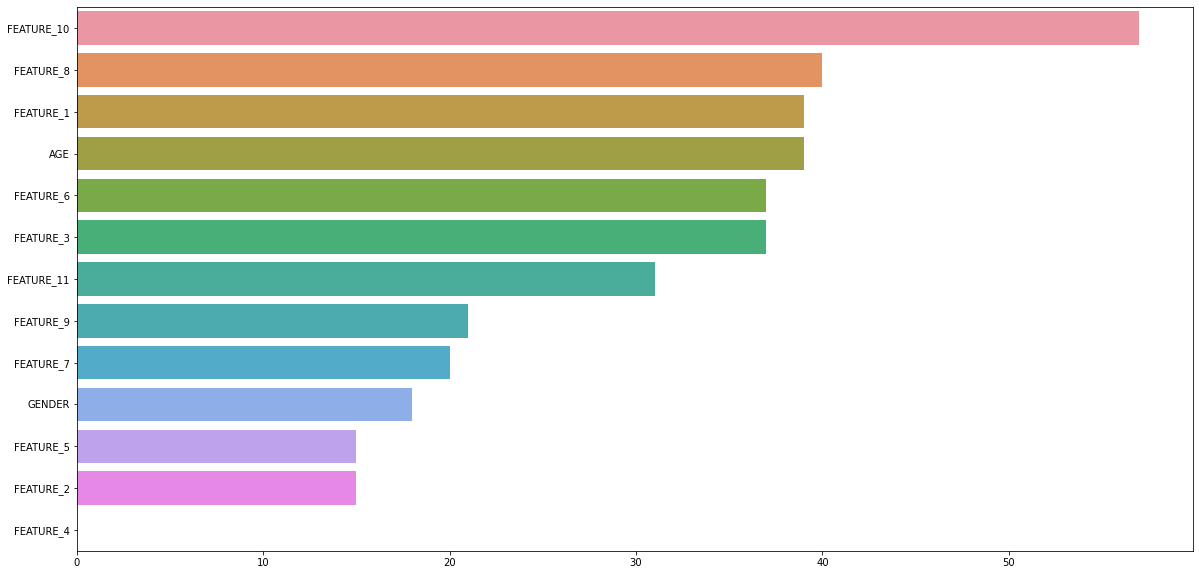

In [95]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

## УДАЛИМ FEATURE_9, ИЗ ЗА КОРРЕЛЯЦИИ С FEATURE_6 И FEATURE_4 ИЗ-ЗА ОТСУТСТВИЯ ВКЛАДА В МОДЕЛЬ И СВЯЗИ С ПЕРЕМЕННОЙ TARGET

In [96]:
data_stand = data_stand.drop(['FEATURE_9','FEATURE_4'], axis = 1)

In [97]:
X = data_stand.drop(['TARGET'], axis=1)
y = data_stand['TARGET']

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(212, 91)

In [99]:
num_class=data_stand['TARGET'].nunique()
num_class

2

In [100]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lg = lgb.LGBMClassifier(silent=False)
param_dist = {
              "n_estimators":  range(10,200,10),
#             "num_leaves ": range(20,40,1)
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 10)
grid_search.fit(X_train,y_train)
best_n_estimators = grid_search.best_estimator_.n_estimators
# best_num_leaves = grid_search.best_estimator_.num_leaves
print(best_n_estimators)

[LightGBM] [Info] Number of positive: 115, number of negative: 97
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542453 -> initscore=0.170221
[LightGBM] [Info] Start training from score 0.170221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [101]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves': 31, 'objective': 'binary','num_class':1, 'learning_rate':0.06}
# num_round = 10
num_round = best_n_estimators
cate_features_name = ['GENDER']
bst = lgb.train(param, train_data,num_round, valid_sets=[validation_data]
                ,categorical_feature = cate_features_name
               )
y_test_predict_lgbm = bst.predict(X_test)
binary_preds = [int(p>0.5) for p in y_test_predict_lgbm]

[LightGBM] [Info] Number of positive: 115, number of negative: 97
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 223
[LightGBM] [Info] Number of data points in the train set: 212, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.542453 -> initscore=0.170221
[LightGBM] [Info] Start training from score 0.170221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.662483
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.639993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.6213
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_logloss: 0.600086
[LightGBM] [Warning] No further splits with positive gain, 

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['GENDER']
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


In [102]:
from sklearn.metrics import classification_report
# НЕКОТОРЫЕ МЕТРИКИ
report = classification_report(y_test, binary_preds)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



## ПОПРОБУЕМ УЛУЧШИТЬ ЗНАЧЕНИЕ recall, ЗА СЧЕТ, ВЫРАВНИВАНИЯ КЛАССОВ

In [125]:
importances = pd.Series(bst.feature_importance(), index=X_test.columns).sort_values(ascending=False)

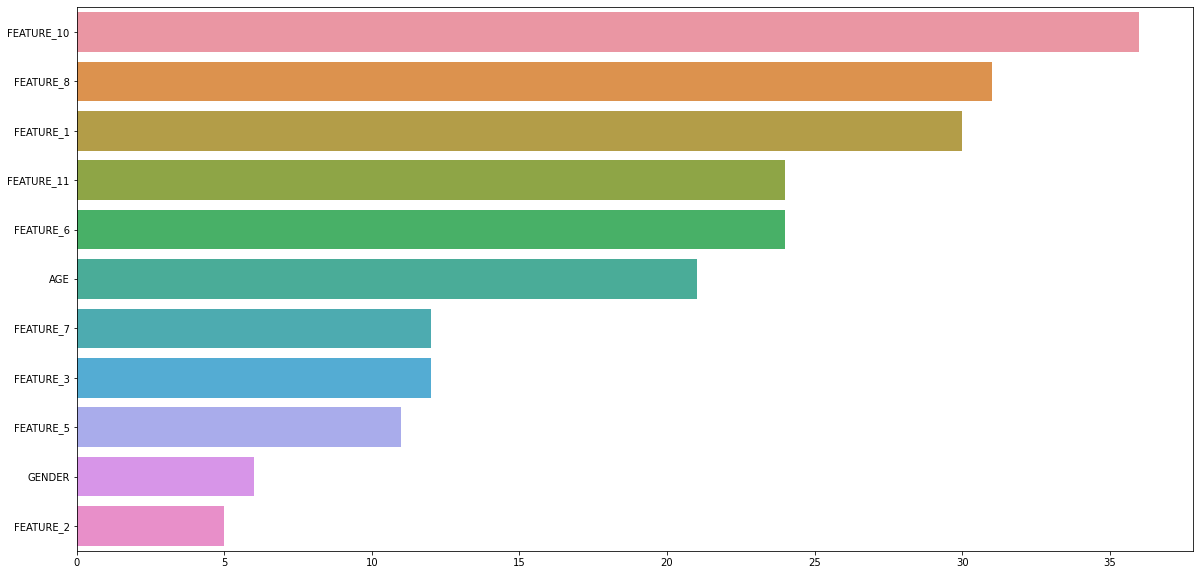

In [104]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

In [105]:
# pip install imblearn --user

In [106]:
y_train.value_counts()

1    115
0     97
Name: TARGET, dtype: int64

In [107]:
# X_train['AGE'] = X_train['AGE'].astype(int)
X_train['GENDER'] = X_train['GENDER'].astype(int)

<ipython-input-107-663461efbbf6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GENDER'] = X_train['GENDER'].astype(int)


## ВЫРАВНЯЕМ ЧИСЛО ЭЛЕМЕНТОВ В КЛАССАХ В ОБУЧАЮЩЕЙ ВЫБОРКЕ

In [108]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [109]:

X_train['GENDER'] = X_train['GENDER'].astype('category')

In [110]:
X_train

,AGE,FEATURE_1,FEATURE_2,FEATURE_3,FEATURE_5,FEATURE_6,FEATURE_7,FEATURE_8,FEATURE_10,FEATURE_11,GENDER
0,-1.691936,1.000921,-2.145254,-0.911892,0.897478,1.281507,-0.695480,-0.895381,-0.713249,-0.512075,0
1,-2.793003,0.031978,-0.092585,-0.815424,-1.004171,2.285648,-0.695480,-0.895381,-0.713249,-0.512075,1
2,-0.480763,1.000921,-0.662770,-0.526020,0.897478,0.364684,-0.695480,0.482653,-0.713249,-0.512075,0
3,-0.040336,-0.936965,0.477601,-0.140149,0.897478,0.452000,-0.695480,0.138144,-0.713249,-0.512075,1
4,-1.802043,1.000921,0.363564,-1.374937,0.897478,1.019558,-0.695480,-0.895381,3.198325,-0.512075,1
...,...,...,...,...,...,...,...,...,...,...,...
225,0.560926,-0.936965,-0.006730,-0.747360,-1.004171,-0.648281,1.433110,1.452323,1.934745,1.121174,1
226,0.007612,1.000921,0.044051,-0.304811,-0.307479,0.223349,-0.695480,-0.487765,0.264644,1.121174,1
227,0.950624,-0.936965,0.527698,2.423630,-1.004171,-0.247997,0.275306,1.685543,2.220431,1.121174,0
228,0.572997,-0.520660,0.379609,0.615718,-1.004171,0.916719,-0.695480,0.508188,1.242538,1.121174,1


In [111]:
y_train.value_counts()

1    115
0    115
Name: TARGET, dtype: int64

In [112]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lg = lgb.LGBMClassifier(silent=False)
param_dist = {
              "n_estimators":  range(10,200,10),
#             "num_leaves ": range(20,40,1)
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 10)
grid_search.fit(X_train,y_train)
best_n_estimators = grid_search.best_estimator_.n_estimators
# best_num_leaves = grid_search.best_estimator_.num_leaves
print(best_n_estimators)

[LightGBM] [Info] Number of positive: 115, number of negative: 115
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [113]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
validation_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
param = {'num_leaves': 31, 'objective': 'binary','num_class':1, 'learning_rate':0.06}
# num_round = 10
num_round = best_n_estimators
cate_features_name = ['GENDER']
bst = lgb.train(param, train_data,num_round, valid_sets=[validation_data]
                ,categorical_feature = cate_features_name
               )
y_test_predict_lgbm = bst.predict(X_test)

[LightGBM] [Info] Number of positive: 115, number of negative: 115
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 247
[LightGBM] [Info] Number of data points in the train set: 230, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.665825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.642167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.6224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_logloss: 0.603883
[LightGBM] [Warning] No further splits with pos

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['GENDER']
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


In [114]:
binary_preds = [int(p>0.5) for p in y_test_predict_lgbm]

In [115]:
from sklearn.metrics import classification_report
# НЕКОТОРЫЕ МЕТРИКИ
report = classification_report(y_test, binary_preds)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        41
           1       0.88      0.84      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [126]:
importances = pd.Series(bst.feature_importance(), index=X_test.columns).sort_values(ascending=False)

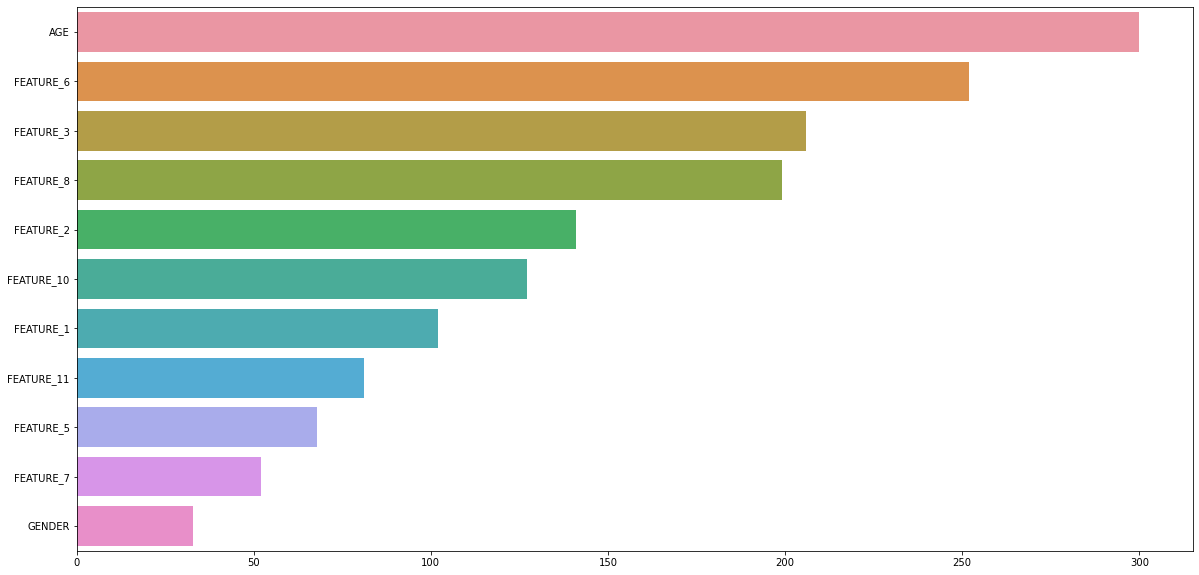

In [117]:
sns.barplot(y=importances.index, x=importances, orient="h")
pass

# ВЫВОД 2. СРЕДНЕЕ F1 85%, при ХОРОШИХ ЗНАЧЕНИЯХ recall   